## Imports

In [18]:
import cv2
import pandas
import numpy
import matplotlib.pyplot as pyplot
import tensorflow
import keras
import pickle
from sklearn.metrics import confusion_matrix,classification_report
import seaborn

In [11]:
pickle_Training_features=open("../Data/Data_Object/Training_Objects/Pickle_Training_features.pickle","rb")
Training_features=pickle.load(pickle_Training_features)
pickle_Training_features.close()
pickle_Training_labels=open("../Data/Data_Object/Training_Objects/Pickle_Training_labels.pickle","rb")
Training_Labels=pickle.load(pickle_Training_labels)
pickle_Training_labels.close()

In [26]:
pickle_Testing_features=open("../Data/Data_Object/Testing_Objects/Pickle_Testing_features.pickle","rb")
Testing_features=pickle.load(pickle_Testing_features)
pickle_Testing_features.close()
pickle_Testing_labels=open("../Data/Data_Object/Testing_Objects/Pickle_Testing_labels.pickle","rb")
Testing_Labels=pickle.load(pickle_Testing_labels)
pickle_Testing_labels.close()

In [27]:
Training_features

array([[[0.63921569, 0.71764706, 0.72941176, ..., 0.38823529,
         0.41568627, 0.47058824],
        [0.66666667, 0.71372549, 0.70980392, ..., 0.40784314,
         0.43137255, 0.49411765],
        [0.68235294, 0.70196078, 0.70588235, ..., 0.43529412,
         0.47843137, 0.49019608],
        ...,
        [0.49411765, 0.63137255, 0.6627451 , ..., 0.74509804,
         0.39607843, 0.13333333],
        [0.46666667, 0.65490196, 0.28627451, ..., 0.7372549 ,
         0.43529412, 0.1254902 ],
        [0.54509804, 0.32156863, 0.41960784, ..., 0.65882353,
         0.34117647, 0.11372549]],

       [[0.4627451 , 0.47843137, 0.50980392, ..., 0.68235294,
         0.69019608, 0.68235294],
        [0.45490196, 0.47058824, 0.50196078, ..., 0.66666667,
         0.6745098 , 0.68627451],
        [0.44705882, 0.4627451 , 0.49411765, ..., 0.65882353,
         0.6627451 , 0.67843137],
        ...,
        [0.23529412, 0.18431373, 0.17647059, ..., 0.17254902,
         0.16470588, 0.15686275],
        [0.2

In [28]:
Training_Labels

[4,
 2,
 4,
 3,
 4,
 0,
 1,
 0,
 4,
 3,
 3,
 2,
 0,
 4,
 4,
 2,
 0,
 2,
 0,
 4,
 4,
 1,
 1,
 2,
 4,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 3,
 3,
 4,
 2,
 4,
 2,
 2,
 3,
 4,
 1,
 3,
 0,
 0,
 2,
 1,
 2,
 4,
 2,
 1,
 2,
 4,
 3,
 4,
 1,
 3,
 2,
 0,
 1,
 0,
 1,
 3,
 3,
 0,
 1,
 1,
 1,
 4,
 4,
 4,
 0,
 4,
 2,
 4,
 4,
 0,
 3,
 3,
 1,
 4,
 2,
 1,
 2,
 4,
 2,
 4,
 2,
 2,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 4,
 4,
 0,
 4,
 4,
 1,
 0,
 3,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 4,
 0,
 4,
 2,
 1,
 2,
 2,
 3,
 0,
 1,
 1,
 1,
 0,
 4,
 3,
 0,
 0,
 4,
 3,
 4,
 4,
 2,
 4,
 4,
 3,
 2,
 1,
 3,
 2,
 4,
 0,
 3,
 0,
 2,
 4,
 0,
 2,
 1,
 0,
 3,
 4,
 4,
 0,
 1,
 4,
 0,
 2,
 0,
 3,
 3,
 2,
 2,
 0,
 4,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 3,
 2,
 3,
 4,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 4,
 3,
 3,
 4,
 0,
 2,
 1,
 4,
 4,
 4,
 3,
 4,
 4,
 1,
 3,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 2,
 3,
 2,
 0,
 1,
 2,
 3,
 4,
 3,
 0,
 0,
 1,
 1,
 2,
 4,
 1,
 1,
 0,
 4,
 1,
 2,
 3,
 0,
 3,
 4,
 1,
 0,
 3,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 2,


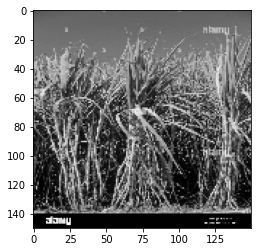

In [29]:
pyplot.imshow(Testing_features[0],cmap='gray')

## Praparing Data for training

In [30]:
Training_features=numpy.array(Training_features)

In [31]:
Training_features.shape

(548, 150, 150)

In [32]:
Testing_features=numpy.array(Testing_features)

In [33]:
Testing_features.shape

(150, 150, 150)

In [34]:
Training_features[0].shape

(150, 150)

In [46]:
Training_features=numpy.expand_dims(Training_features,axis=-1)
Testing_features=numpy.expand_dims(Testing_features,axis=-1)

In [48]:
Training_features.shape

(548, 150, 150, 1)

In [49]:
Testing_features.shape

(150, 150, 150, 1)

# Model Definition

In [51]:
Simple_Model_1=keras.models.Sequential(
[
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[150,150,1]),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=512,activation='relu'),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=5,activation='softmax')
]
)

In [52]:
Simple_Model_1

In [53]:
Simple_Model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               89719296  
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total params: 89,785,925
Trainable params: 89,785,925
Non-trainable params: 0
__________________________________________

In [54]:
Simple_Model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
Simple_Model_1.fit(Training_features,numpy.array(Training_Labels),epochs=10,verbose=1,validation_data=(Testing_features,numpy.array(Testing_Labels)))

Epoch 1/10
18/18 [==============================] - 16s 905ms/step - loss: 0.1145 - accuracy: 0.9836 - val_loss: 1.6672 - val_accuracy: 0.4267
Epoch 2/10
18/18 [==============================] - 16s 921ms/step - loss: 0.0740 - accuracy: 0.9927 - val_loss: 1.6928 - val_accuracy: 0.4600
Epoch 3/10
18/18 [==============================] - 16s 912ms/step - loss: 0.0464 - accuracy: 0.9945 - val_loss: 1.7260 - val_accuracy: 0.3933
Epoch 4/10
18/18 [==============================] - 16s 899ms/step - loss: 0.0371 - accuracy: 0.9964 - val_loss: 1.8479 - val_accuracy: 0.4133
Epoch 5/10
18/18 [==============================] - 16s 900ms/step - loss: 0.0316 - accuracy: 0.9982 - val_loss: 1.9520 - val_accuracy: 0.3867
Epoch 6/10
18/18 [==============================] - 16s 912ms/step - loss: 0.0232 - accuracy: 0.9982 - val_loss: 1.8481 - val_accuracy: 0.4067
Epoch 7/10
18/18 [==============================] - 16s 916ms/step - loss: 0.0301 - accuracy: 0.9964 - val_loss: 1.7691 - val_accuracy: 0.4600

In [58]:
Simple_Model_1.save("../Models/Simple_Model_1_For_Crop_Detection.h5")

## prediction

In [183]:
Predictions=Simple_Model_1.predict(Testing_features)

In [167]:
Predictions[500]

array([2.9313902e-04, 6.6432673e-05, 2.6086625e-04, 9.9642843e-01,
       2.9512178e-03], dtype=float32)

In [168]:
max(Predictions[500])

0.99642843

In [169]:
Training_Labels[500]

3

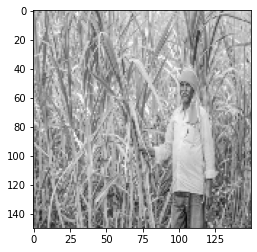

In [170]:
pyplot.imshow(Training_features[500],cmap='gray')

In [147]:
class_list=[
    "Cotton",
    "Maize",
    "Rice",
    "Sugarcane",
    "Wheat"
]

In [148]:
testing_image=cv2.imread("./cotton.jpg",cv2.IMREAD_GRAYSCALE)
testing_image=cv2.resize(testing_image,(150,150))
testing_image=testing_image/255

In [134]:
testing_image

array([[0.61960784, 0.62745098, 0.64705882, ..., 0.77647059, 0.75686275,
        0.74509804],
       [0.63529412, 0.63921569, 0.65098039, ..., 0.76470588, 0.76078431,
        0.74509804],
       [0.65098039, 0.65490196, 0.66666667, ..., 0.77254902, 0.76078431,
        0.74117647],
       ...,
       [0.20392157, 0.20784314, 0.20392157, ..., 0.0627451 , 0.12941176,
        0.14509804],
       [0.16862745, 0.22745098, 0.21960784, ..., 0.08627451, 0.22352941,
        0.36470588],
       [0.20392157, 0.18431373, 0.24313725, ..., 0.21568627, 0.3372549 ,
        0.32941176]])

In [135]:
testing_image=numpy.array([testing_image])

In [136]:
testing_image.shape

(1, 150, 150)

In [137]:
testing_image=numpy.expand_dims(testing_image,axis=-1)

In [138]:
predicted_crop=Simple_Model_1.predict([testing_image])[0]

In [140]:
predicted_crop

array([0.08983934, 0.03192858, 0.00282563, 0.03472175, 0.84068465],
      dtype=float32)

In [176]:
def getClass(array):
    index=0
    max_=max(array)
    for i in range(len(array)):
        if array[i]==max_:
            index=i
#     print(class_list[index])
    return class_list[index]

In [177]:
getClass(predicted_crop)

'Wheat'

In [178]:
Training_predictions=[]
Training_Labels_value=[]
for i in range(len(Predictions)):
    Training_predictions.append(getClass(Predictions[i]))
    Training_Labels_value.append(class_list[Training_Labels[i]])

In [179]:
Training_predictions

['Wheat',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Cotton',
 'Maize',
 'Cotton',
 'Wheat',
 'Sugarcane',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Wheat',
 'Wheat',
 'Rice',
 'Cotton',
 'Rice',
 'Cotton',
 'Wheat',
 'Wheat',
 'Maize',
 'Maize',
 'Rice',
 'Wheat',
 'Cotton',
 'Rice',
 'Cotton',
 'Cotton',
 'Maize',
 'Cotton',
 'Maize',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Rice',
 'Sugarcane',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Cotton',
 'Cotton',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Maize',
 'Cotton',
 'Maize',
 'Sugarcane',
 'Sugarcane',
 'Cotton',
 'Maize',
 'Maize',
 'Maize',
 'Wheat',
 'Wheat',
 'Wheat',
 'Cotton',
 'Wheat',
 'Rice',
 'Wheat',
 'Wheat',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Maize',
 'Wheat',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Rice',
 'Cotton',
 'Cotton',
 'Cotton',
 'Sugarcane',
 'Co

In [180]:
Training_Labels_value

['Wheat',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Cotton',
 'Maize',
 'Cotton',
 'Wheat',
 'Sugarcane',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Wheat',
 'Wheat',
 'Rice',
 'Cotton',
 'Rice',
 'Cotton',
 'Wheat',
 'Wheat',
 'Maize',
 'Maize',
 'Rice',
 'Wheat',
 'Cotton',
 'Rice',
 'Cotton',
 'Cotton',
 'Maize',
 'Cotton',
 'Maize',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Rice',
 'Sugarcane',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Cotton',
 'Cotton',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Sugarcane',
 'Wheat',
 'Maize',
 'Sugarcane',
 'Rice',
 'Cotton',
 'Maize',
 'Cotton',
 'Maize',
 'Sugarcane',
 'Sugarcane',
 'Cotton',
 'Maize',
 'Maize',
 'Maize',
 'Wheat',
 'Wheat',
 'Wheat',
 'Cotton',
 'Wheat',
 'Rice',
 'Wheat',
 'Wheat',
 'Cotton',
 'Sugarcane',
 'Sugarcane',
 'Maize',
 'Wheat',
 'Rice',
 'Maize',
 'Rice',
 'Wheat',
 'Rice',
 'Wheat',
 'Rice',
 'Rice',
 'Cotton',
 'Cotton',
 'Cotton',
 'Sugarcane',
 'Co

In [182]:
print("Actual values --> Predicted values",)
for i in range(len(Predictions)):
    print(Training_Labels_value[i],"  ->  ",Training_predictions[i])

Actual values --> Predicted values
Wheat   ->   Wheat
Rice   ->   Rice
Wheat   ->   Wheat
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Cotton   ->   Cotton
Maize   ->   Maize
Cotton   ->   Cotton
Wheat   ->   Wheat
Sugarcane   ->   Sugarcane
Sugarcane   ->   Sugarcane
Rice   ->   Rice
Cotton   ->   Cotton
Wheat   ->   Wheat
Wheat   ->   Wheat
Rice   ->   Rice
Cotton   ->   Cotton
Rice   ->   Rice
Cotton   ->   Cotton
Wheat   ->   Wheat
Wheat   ->   Wheat
Maize   ->   Maize
Maize   ->   Maize
Rice   ->   Rice
Wheat   ->   Wheat
Cotton   ->   Cotton
Rice   ->   Rice
Cotton   ->   Cotton
Cotton   ->   Cotton
Maize   ->   Maize
Cotton   ->   Cotton
Maize   ->   Maize
Cotton   ->   Cotton
Sugarcane   ->   Sugarcane
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Rice   ->   Rice
Wheat   ->   Wheat
Rice   ->   Rice
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Maize   ->   Maize
Sugarcane   ->   Sugarcane
Cotton   ->   Cotton
Cotton   ->   Cotton
Rice   ->   Rice
Maize   ->  

Cotton   ->   Cotton
Sugarcane   ->   Sugarcane
Cotton   ->   Cotton
Cotton   ->   Cotton
Rice   ->   Rice
Rice   ->   Rice
Wheat   ->   Wheat
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Maize   ->   Maize
Sugarcane   ->   Sugarcane
Cotton   ->   Cotton
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Maize   ->   Maize
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Rice   ->   Rice
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Rice   ->   Rice
Cotton   ->   Cotton
Cotton   ->   Cotton
Sugarcane   ->   Sugarcane
Maize   ->   Maize
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Rice   ->   Rice
Wheat   ->   Wheat
Cotton   ->   Cotton
Wheat   ->   Wheat
Rice   ->   Rice
Cotton   ->   Cotton
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Wheat   ->   Wheat
Maize   ->   Maize
Rice   ->   Rice
Sugarcane   ->   Sugarcane
Sugarcane   ->   Sugarcane
Rice   ->   Rice
Wheat   ->   Wheat


In [184]:

Testing_predictions=[]
Testing_Labels_value=[]
for i in range(len(Predictions)):
    Testing_predictions.append(getClass(Predictions[i]))
    Testing_Labels_value.append(class_list[Testing_Labels[i]])



In [185]:
print("Actual values --> Predicted values",)
for i in range(len(Predictions)):
    print(Testing_Labels_value[i],"  ->  ",Testing_predictions[i])

Actual values --> Predicted values
Sugarcane   ->   Wheat
Sugarcane   ->   Sugarcane
Sugarcane   ->   Sugarcane
Cotton   ->   Cotton
Cotton   ->   Cotton
Wheat   ->   Rice
Rice   ->   Maize
Maize   ->   Wheat
Sugarcane   ->   Wheat
Sugarcane   ->   Cotton
Cotton   ->   Wheat
Wheat   ->   Wheat
Maize   ->   Sugarcane
Sugarcane   ->   Sugarcane
Sugarcane   ->   Sugarcane
Wheat   ->   Rice
Sugarcane   ->   Maize
Cotton   ->   Cotton
Sugarcane   ->   Rice
Rice   ->   Sugarcane
Maize   ->   Wheat
Maize   ->   Rice
Maize   ->   Maize
Wheat   ->   Sugarcane
Sugarcane   ->   Cotton
Rice   ->   Rice
Maize   ->   Sugarcane
Rice   ->   Wheat
Rice   ->   Wheat
Maize   ->   Wheat
Wheat   ->   Wheat
Cotton   ->   Cotton
Wheat   ->   Wheat
Wheat   ->   Wheat
Rice   ->   Wheat
Cotton   ->   Cotton
Rice   ->   Cotton
Cotton   ->   Cotton
Rice   ->   Wheat
Wheat   ->   Wheat
Sugarcane   ->   Rice
Cotton   ->   Cotton
Maize   ->   Maize
Maize   ->   Cotton
Sugarcane   ->   Sugarcane
Wheat   ->   Wheat
Ri

In [186]:
confusion_matrix(Testing_Labels_value,Testing_predictions)

array([[25,  1,  0,  1,  3],
       [ 6,  5,  2,  7, 10],
       [ 5,  2,  6,  4, 13],
       [ 4,  1,  7, 12,  6],
       [ 2,  0,  8,  4, 16]], dtype=int64)

<AxesSubplot:>

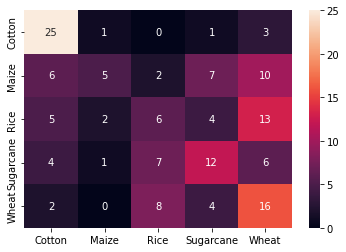

In [192]:
seaborn.heatmap(confusion_matrix(Testing_Labels_value,Testing_predictions),annot=True,xticklabels=class_list,yticklabels=class_list)

In [194]:
print(classification_report(Testing_Labels_value,Testing_predictions))

              precision    recall  f1-score   support

      Cotton       0.60      0.83      0.69        30
       Maize       0.56      0.17      0.26        30
        Rice       0.26      0.20      0.23        30
   Sugarcane       0.43      0.40      0.41        30
       Wheat       0.33      0.53      0.41        30

    accuracy                           0.43       150
   macro avg       0.43      0.43      0.40       150
weighted avg       0.43      0.43      0.40       150

